### The following Installs Requirements.

In [ ]:
%pip install numpy
%pip install matplotlib

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

### The following Code Creates Box Plots.
#### one plot for each weight, each containing #policies boxes.

In [41]:
##Experiment 5: Created the box plots. Each plot, y-axis:work and x-axis:algs, for one weight.
weight_to_int = {"1.50":0, "2.00":1, '3.00':2, '4.00':3, '5.00':4, '6.00':5, '7.00':6, '8.00':7, '9.00':8, '10.00':9}
int_to_alg = {0:'WA*', 1:'pwXD', 2:'pwXU', 3:'XDP', 4:'XUP', 5:'DSMAP'}
numPolicies = len(int_to_alg)
fileName = 'partial_SC1_E8TS30'
Weights = {"1.50":[], "2.00":[], '3.00':[], '4.00':[], '5.00':[], '6.00':[], '7.00':[], '8.00':[], '9.00':[], '10.00':[]}
for w in Weights.values():
    for i in range(numPolicies):
        a = []
        w.append(a)

cnt = 0
with open("./results/"+fileName+"-results.txt", "r") as f:
    numLines = len(f.readlines())
with open("./results/"+fileName+"-results.txt", "r") as f:
    for line in f:
        data = line.split()
        if(len(data)): ## To check for empy lines
            if data[0] == "MAP" and (data[7] in list(weight_to_int.keys())) and (int(data[5]) in list(int_to_alg.keys())):
                # np.append(Weights[data[7]][int(data[5])],(int(data[9])))
                Weights[data[7]][int(data[5])].append(int(data[9]))
            if data[0] == "STP" and (data[5] in list(weight_to_int.keys())) and (int(data[3]) in list(int_to_alg.keys())):
                # np.append(Weights[data[7]][int(data[5])],(int(data[9])))
                Weights[data[5]][int(data[3])].append(int(data[7]))

        cnt += 1
        if cnt/numLines*100 % 10 == 0:
            print(cnt/numLines*100, '%')
print("Done Reading the Data..")

5.0 %
10.0 %
15.0 %
20.0 %
25.0 %
30.0 %
35.0 %
40.0 %
45.0 %
50.0 %
60.0 %
65.0 %
70.0 %
75.0 %
80.0 %
85.0 %
90.0 %
95.0 %
100.0 %
Done Reading the Data..


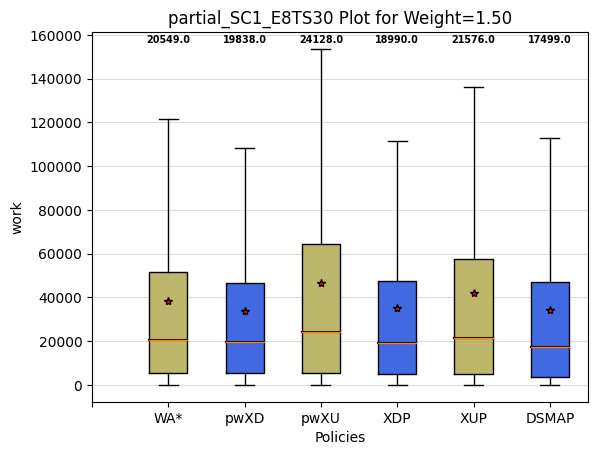

Box information:
 Policy WA*
 median 20549.0
 upper_quartile 51849.0
 lower_quartile 5315.0
 upper_whisker 121649
 lower_whisker 26

 Policy pwXD
 median 19838.0
 upper_quartile 46671.5
 lower_quartile 5464.5
 upper_whisker 108480
 lower_whisker 23

 Policy pwXU
 median 24128.0
 upper_quartile 64585.5
 lower_quartile 5249.0
 upper_whisker 153587
 lower_whisker 23

 Policy XDP
 median 18990.0
 upper_quartile 47577.0
 lower_quartile 4838.5
 upper_whisker 111683
 lower_whisker 23

 Policy XUP
 median 21576.0
 upper_quartile 57507.5
 lower_quartile 5017.0
 upper_whisker 136224
 lower_whisker 23

 Policy DSMAP
 median 17499.0
 upper_quartile 47280.0
 lower_quartile 3530.5
 upper_whisker 112904
 lower_whisker 23



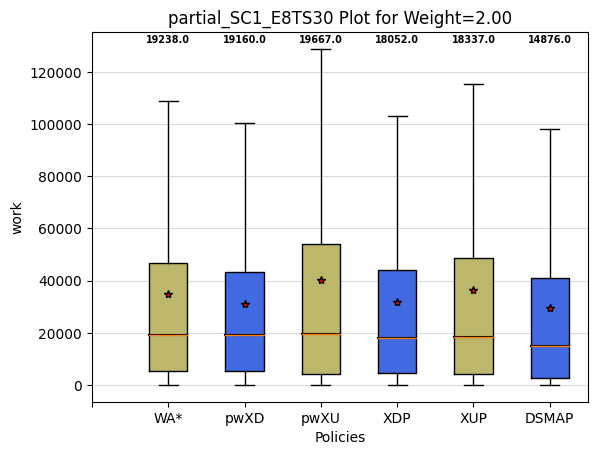

Box information:
 Policy WA*
 median 19238.0
 upper_quartile 46714.0
 lower_quartile 5317.0
 upper_whisker 108804
 lower_whisker 29

 Policy pwXD
 median 19160.0
 upper_quartile 43431.5
 lower_quartile 5499.5
 upper_whisker 100326
 lower_whisker 23

 Policy pwXU
 median 19667.0
 upper_quartile 54037.5
 lower_quartile 4192.0
 upper_whisker 128798
 lower_whisker 23

 Policy XDP
 median 18052.0
 upper_quartile 44015.0
 lower_quartile 4758.5
 upper_whisker 102899
 lower_whisker 23

 Policy XUP
 median 18337.0
 upper_quartile 48675.0
 lower_quartile 4345.0
 upper_whisker 115163
 lower_whisker 24

 Policy DSMAP
 median 14876.0
 upper_quartile 40972.0
 lower_quartile 2818.0
 upper_whisker 98200
 lower_whisker 23



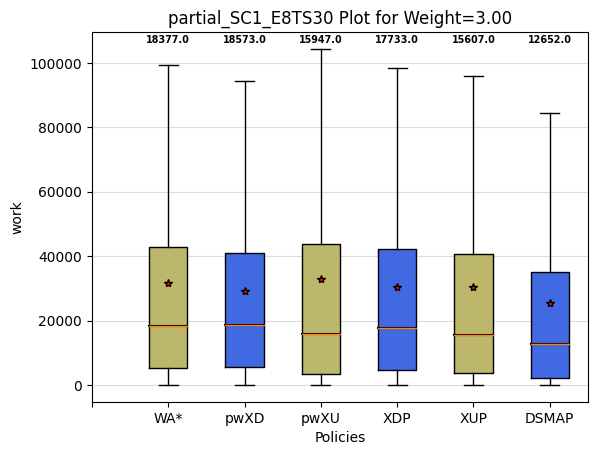

Box information:
 Policy WA*
 median 18377.0
 upper_quartile 42913.0
 lower_quartile 5216.0
 upper_whisker 99458
 lower_whisker 38

 Policy pwXD
 median 18573.0
 upper_quartile 41023.5
 lower_quartile 5494.0
 upper_whisker 94317
 lower_whisker 23

 Policy pwXU
 median 15947.0
 upper_quartile 43698.5
 lower_quartile 3266.5
 upper_whisker 104334
 lower_whisker 23

 Policy XDP
 median 17733.0
 upper_quartile 42214.5
 lower_quartile 4766.0
 upper_whisker 98382
 lower_whisker 24

 Policy XUP
 median 15607.0
 upper_quartile 40581.5
 lower_quartile 3676.0
 upper_whisker 95935
 lower_whisker 24

 Policy DSMAP
 median 12652.0
 upper_quartile 35144.5
 lower_quartile 2264.0
 upper_whisker 84464
 lower_whisker 23



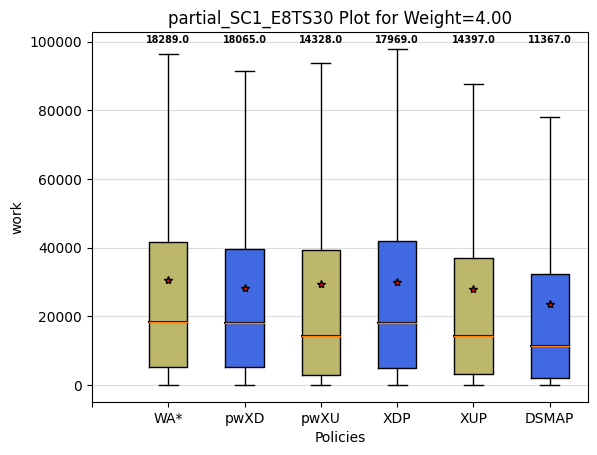

Box information:
 Policy WA*
 median 18289.0
 upper_quartile 41753.0
 lower_quartile 5277.0
 upper_whisker 96460
 lower_whisker 39

 Policy pwXD
 median 18065.0
 upper_quartile 39735.0
 lower_quartile 5354.0
 upper_whisker 91306
 lower_whisker 23

 Policy pwXU
 median 14328.0
 upper_quartile 39185.5
 lower_quartile 2872.0
 upper_whisker 93655
 lower_whisker 23

 Policy XDP
 median 17969.0
 upper_quartile 42058.5
 lower_quartile 4869.0
 upper_whisker 97842
 lower_whisker 24

 Policy XUP
 median 14397.0
 upper_quartile 37045.0
 lower_quartile 3336.0
 upper_whisker 87607
 lower_whisker 24

 Policy DSMAP
 median 11367.0
 upper_quartile 32386.5
 lower_quartile 1995.0
 upper_whisker 77973
 lower_whisker 23



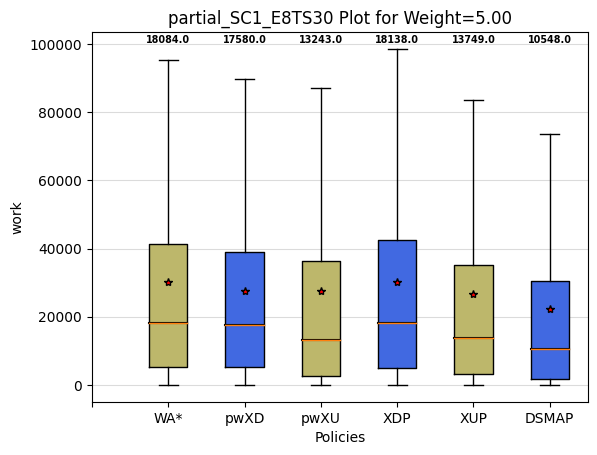

Box information:
 Policy WA*
 median 18084.0
 upper_quartile 41247.0
 lower_quartile 5288.0
 upper_whisker 95183
 lower_whisker 41

 Policy pwXD
 median 17580.0
 upper_quartile 38986.5
 lower_quartile 5175.5
 upper_whisker 89701
 lower_whisker 23

 Policy pwXU
 median 13243.0
 upper_quartile 36357.0
 lower_quartile 2635.0
 upper_whisker 86940
 lower_whisker 23

 Policy XDP
 median 18138.0
 upper_quartile 42399.0
 lower_quartile 4971.5
 upper_whisker 98530
 lower_whisker 24

 Policy XUP
 median 13749.0
 upper_quartile 35323.0
 lower_quartile 3167.0
 upper_whisker 83553
 lower_whisker 23

 Policy DSMAP
 median 10548.0
 upper_quartile 30524.5
 lower_quartile 1829.5
 upper_whisker 73562
 lower_whisker 23



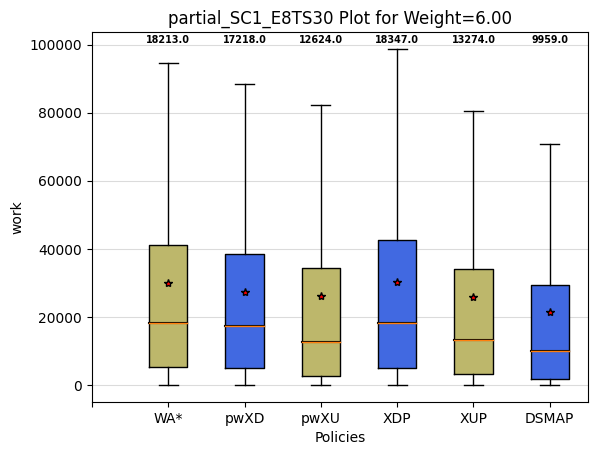

Box information:
 Policy WA*
 median 18213.0
 upper_quartile 41006.0
 lower_quartile 5306.0
 upper_whisker 94548
 lower_whisker 33

 Policy pwXD
 median 17218.0
 upper_quartile 38435.0
 lower_quartile 5020.0
 upper_whisker 88549
 lower_whisker 23

 Policy pwXU
 median 12624.0
 upper_quartile 34454.0
 lower_quartile 2508.0
 upper_whisker 82370
 lower_whisker 23

 Policy XDP
 median 18347.0
 upper_quartile 42544.5
 lower_quartile 5091.0
 upper_whisker 98718
 lower_whisker 25

 Policy XUP
 median 13274.0
 upper_quartile 34014.0
 lower_quartile 3088.0
 upper_whisker 80401
 lower_whisker 24

 Policy DSMAP
 median 9959.0
 upper_quartile 29380.5
 lower_quartile 1686.0
 upper_whisker 70920
 lower_whisker 23



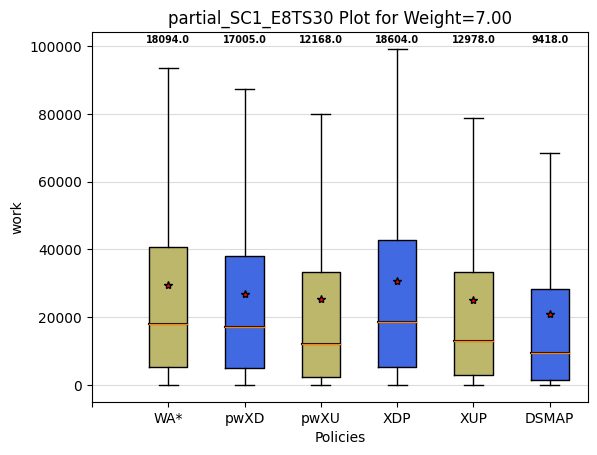

Box information:
 Policy WA*
 median 18094.0
 upper_quartile 40590.0
 lower_quartile 5320.0
 upper_whisker 93495
 lower_whisker 36

 Policy pwXD
 median 17005.0
 upper_quartile 37940.5
 lower_quartile 4915.0
 upper_whisker 87477
 lower_whisker 23

 Policy pwXU
 median 12168.0
 upper_quartile 33364.5
 lower_quartile 2389.0
 upper_whisker 79816
 lower_whisker 23

 Policy XDP
 median 18604.0
 upper_quartile 42798.5
 lower_quartile 5223.0
 upper_whisker 99161
 lower_whisker 25

 Policy XUP
 median 12978.0
 upper_quartile 33293.0
 lower_quartile 2990.0
 upper_whisker 78746
 lower_whisker 23

 Policy DSMAP
 median 9418.0
 upper_quartile 28283.0
 lower_quartile 1580.0
 upper_whisker 68335
 lower_whisker 23



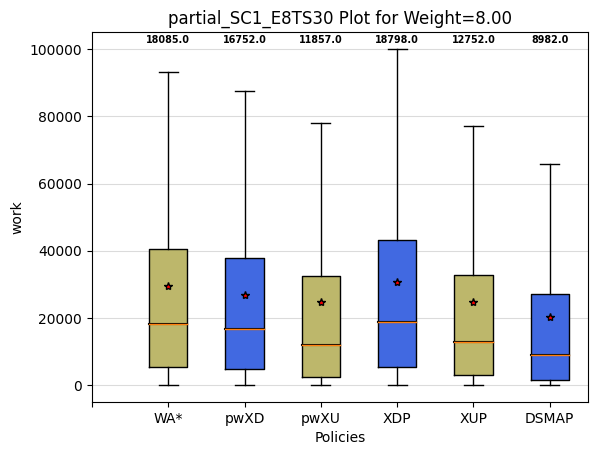

Box information:
 Policy WA*
 median 18085.0
 upper_quartile 40604.0
 lower_quartile 5414.0
 upper_whisker 93388
 lower_whisker 38

 Policy pwXD
 median 16752.0
 upper_quartile 37865.5
 lower_quartile 4717.0
 upper_whisker 87586
 lower_whisker 23

 Policy pwXU
 median 11857.0
 upper_quartile 32600.5
 lower_quartile 2333.5
 upper_whisker 77994
 lower_whisker 23

 Policy XDP
 median 18798.0
 upper_quartile 43219.0
 lower_quartile 5278.5
 upper_whisker 100125
 lower_whisker 26

 Policy XUP
 median 12752.0
 upper_quartile 32637.5
 lower_quartile 2920.0
 upper_whisker 77210
 lower_whisker 24

 Policy DSMAP
 median 8982.0
 upper_quartile 27235.0
 lower_quartile 1516.0
 upper_whisker 65808
 lower_whisker 23



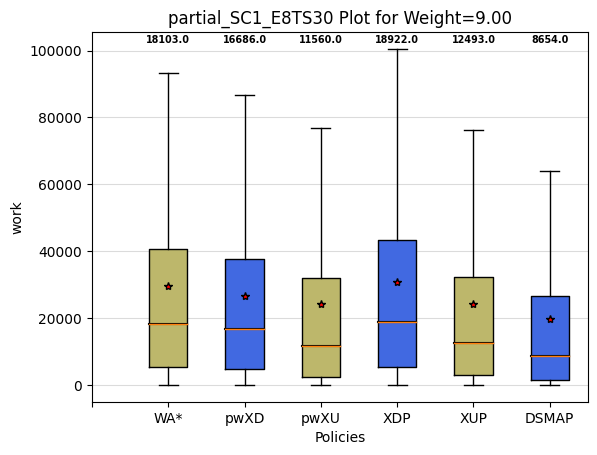

Box information:
 Policy WA*
 median 18103.0
 upper_quartile 40531.0
 lower_quartile 5390.0
 upper_whisker 93239
 lower_whisker 41

 Policy pwXD
 median 16686.0
 upper_quartile 37567.5
 lower_quartile 4714.0
 upper_whisker 86841
 lower_whisker 23

 Policy pwXU
 median 11560.0
 upper_quartile 32119.5
 lower_quartile 2272.0
 upper_whisker 76889
 lower_whisker 23

 Policy XDP
 median 18922.0
 upper_quartile 43406.5
 lower_quartile 5336.0
 upper_whisker 100500
 lower_whisker 25

 Policy XUP
 median 12493.0
 upper_quartile 32225.5
 lower_quartile 2885.0
 upper_whisker 76235
 lower_whisker 23

 Policy DSMAP
 median 8654.0
 upper_quartile 26486.0
 lower_quartile 1490.0
 upper_whisker 63979
 lower_whisker 23



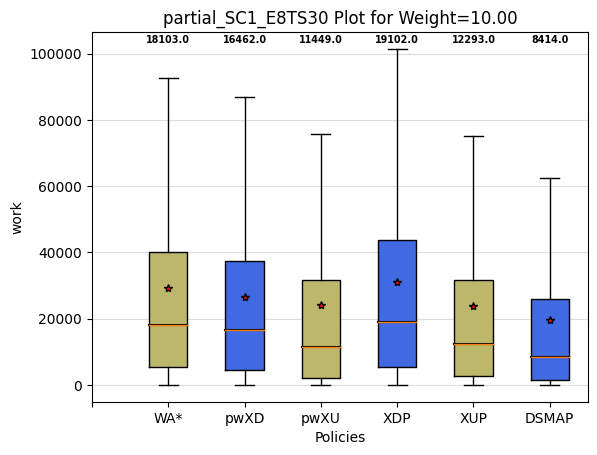

Box information:
 Policy WA*
 median 18103.0
 upper_quartile 40273.0
 lower_quartile 5398.0
 upper_whisker 92583
 lower_whisker 42

 Policy pwXD
 median 16462.0
 upper_quartile 37499.5
 lower_quartile 4582.0
 upper_whisker 86874
 lower_whisker 23

 Policy pwXU
 median 11449.0
 upper_quartile 31692.5
 lower_quartile 2223.0
 upper_whisker 75892
 lower_whisker 23

 Policy XDP
 median 19102.0
 upper_quartile 43817.0
 lower_quartile 5416.0
 upper_whisker 101418
 lower_whisker 27

 Policy XUP
 median 12293.0
 upper_quartile 31751.5
 lower_quartile 2813.5
 upper_whisker 75158
 lower_whisker 24

 Policy DSMAP
 median 8414.0
 upper_quartile 25848.0
 lower_quartile 1485.0
 upper_whisker 62388
 lower_whisker 23



In [42]:
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))

    fig, ax = plt.subplots()

    bp = ax.boxplot(data, showfliers=False, notch=False, sym='+', vert=True, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.8)
    ax.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=fileName + ' Plot for Weight=' + list(Weights.keys())[w],
        xlabel='Policies',
        ylabel='work',
    )

    box_colors = ['darkkhaki', 'royalblue']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax.plot(np.average(med.get_xdata()), np.average(data[i]),
                color='r', marker='*', markeredgecolor='k')
        
    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    thickness = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax.get_xticklabels()):

        ax.text(pos[tick], .97, upper_labels[tick],
                transform=ax.get_xaxis_transform(), weight=thickness[1],
                horizontalalignment='center', size='x-small')

    y_pos = np.arange(len(int_to_alg.values())+1)
    labels = ['']
    labels += list(int_to_alg.values())
    plt.xticks(y_pos, labels)

    plt.show()
    print('Box information:')
    for alg in range(len(data)):
        median = np.median(data[alg])
        upper_quartile = np.percentile(data[alg], 75)
        lower_quartile = np.percentile(data[alg], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = data[alg][data[alg]<=upper_quartile+1.5*iqr].max()
        lower_whisker = data[alg][data[alg]>=lower_quartile-1.5*iqr].min()

        print(' Policy '+int_to_alg[alg])
        print(' median', median)
        print(' upper_quartile', upper_quartile)
        print(' lower_quartile', lower_quartile)
        print(' upper_whisker', upper_whisker)
        print(' lower_whisker', lower_whisker)
        print()
    print('====================================')